In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [13]:

from tensorflow.keras.datasets import cifar100


(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')


x_train, x_test = x_train / 255.0, x_test / 255.0

print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training set shape: (50000, 32, 32, 3) (50000, 1)
Test set shape: (10000, 32, 32, 3) (10000, 1)


In [14]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [55]:
model=Sequential([Conv2D(500,3,activation='relu'),MaxPooling2D(pool_size=(3,3)),Conv2D(250,3,activation='relu'),MaxPooling2D(pool_size=(3,3)),Flatten(),Dense(1000,activation='relu'),Dense(500,activation='relu'),Dense(50000,activation='softmax')])

In [56]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [57]:
history=model.fit(x_train,y_train,epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.0286 - loss: 4.6773
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.1436 - loss: 3.5475
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.2410 - loss: 3.0412
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.3039 - loss: 2.7052
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3515 - loss: 2.4742
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4016 - loss: 2.2664
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4382 - loss: 2.1062
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4760 - loss: 1.9182
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5154 - loss: 1.7464
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5506 - loss: 1.5888
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5928 - loss: 1.4229
Epoch 12

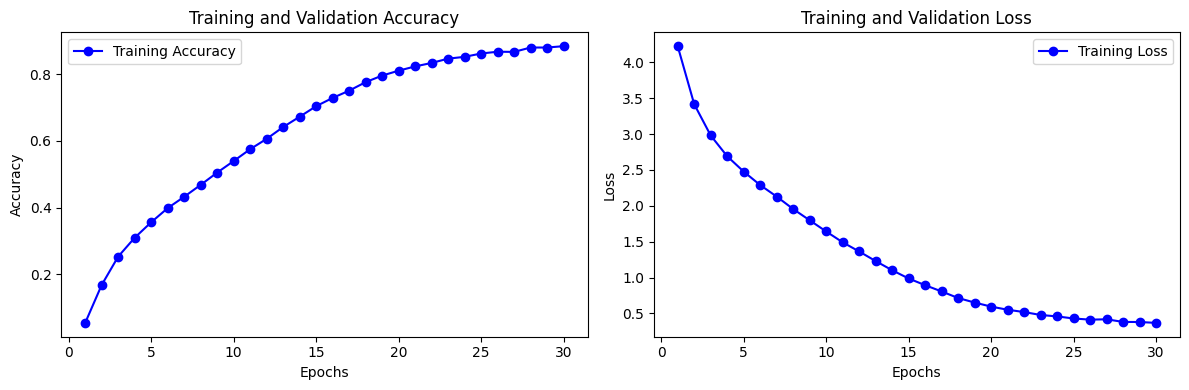

In [59]:
import matplotlib.pyplot as plt



def plot_training_history(history):
    acc = history.history['accuracy']
    
    loss = history.history['loss']

    epochs = range(1, len(acc) + 1)

    
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training_history(history)
